In [34]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit, RandomizedSearchCV
from xgboost import XGBClassifier




In [35]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [36]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [37]:
#data.drop(columns=['customerID'], inplace=True)
data['Churn'][data['Churn'] == 'Yes'] = 1
data['Churn'][data['Churn'] == 'No'] = 0
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

C:\Users\mprev\AppData\Local\Temp\ipykernel_18088\2240443310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'][data['Churn'] == 'Yes'] = 1
C:\Users\mprev\AppData\Local\Temp\ipykernel_18088\2240443310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'][data['Churn'] == 'No'] = 0


In [38]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
data.dropna(inplace=True)

In [40]:
# Analise exploratória
#       ver nans no dataset
#       ver distribuição das features no dataset
#       tentar ver feature importance no dataset

In [41]:
# Categorical feature funtions
def parse_one_hot(df, old_column):
    new_df = df.copy()
    new_columns = new_df[old_column].unique()
    if len(new_columns) > 2: 
        for column in new_columns:
            new_df[column] = 0
            new_df[column][new_df[old_column] == column] = 1
    if len(new_columns) == 2:
        new_df[new_columns[0]] = 0
        new_df[new_columns[0]][new_df[old_column] == new_columns[0]] = 1
    new_df.drop(columns=[old_column], inplace=True)
    return new_df

In [42]:
# Categorical features:

# replace yes, no
yes_columns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport' ,'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'OnlineSecurity', 'OnlineBackup']
for column in yes_columns:
    data[column][data[column]=='No'] = 0
    data[column][data[column]=='No internet service'] = -1
    data[column][data[column]=='Yes'] = 1

# replace gender
data['gender'][data['gender']=='Female'] = 0
data['gender'][data['gender']=='Male'] = 1

# cat enconder
data['MultipleLines'][data['MultipleLines']=='No'] = 0
data['MultipleLines'][data['MultipleLines']=='No phone service'] = 1
data['MultipleLines'][data['MultipleLines']=='Yes'] = 2

data['Contract'][data['Contract']=='Month-to-month'] = 1
data['Contract'][data['Contract']=='One year'] = 12
data['Contract'][data['Contract']=='Two year'] = 24

# one hot-enconder
data = parse_one_hot(data, 'PaymentMethod')
data = parse_one_hot(data, 'InternetService')

data

C:\Users\mprev\AppData\Local\Temp\ipykernel_18088\3330404047.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column]=='No'] = 0
C:\Users\mprev\AppData\Local\Temp\ipykernel_18088\3330404047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column]=='No internet service'] = -1
C:\Users\mprev\AppData\Local\Temp\ipykernel_18088\3330404047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col

C:\Users\mprev\AppData\Local\Temp\ipykernel_18088\3330404047.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MultipleLines'][data['MultipleLines']=='No phone service'] = 1
C:\Users\mprev\AppData\Local\Temp\ipykernel_18088\3330404047.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MultipleLines'][data['MultipleLines']=='Yes'] = 2
C:\Users\mprev\AppData\Local\Temp\ipykernel_18088\3330404047.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic),DSL,Fiber optic,No
0,7590-VHVEG,0,0,1,0,1,0,1,0,1,...,29.85,29.85,0,1,0,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,0,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,1,0,...,42.30,1840.75,0,0,0,1,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,1,0,...,84.80,1990.50,0,0,1,0,0,1,0,0
7039,2234-XADUH,0,0,1,1,72,1,2,0,1,...,103.20,7362.90,0,0,0,0,1,0,1,0
7040,4801-JZAZL,0,0,1,1,11,0,1,1,0,...,29.60,346.45,0,1,0,0,0,1,0,0
7041,8361-LTMKD,1,1,1,0,4,1,2,0,0,...,74.40,306.60,1,0,1,0,0,0,1,0


In [43]:
# numerical features
def standarize(df, numerical_features):
    scaler = StandardScaler()
    df_copy = df.copy()
    df_copy[numerical_features] = scaler.fit_transform(df_copy[numerical_features])
    return df_copy
    

In [44]:
data = standarize(data,['MonthlyCharges','TotalCharges', 'tenure'])

KeyError: ('MonthlyCharges', 'TotalCharges', 'tenure')

In [ ]:
# remove useless column
data.drop(columns=['customerID'],inplace=True)

In [ ]:
# stratify train test
train, test = train_test_split(data, test_size=0.2, stratify=data['Churn'], random_state=42)

full_train = train.copy()
y_train = train['Churn']
train.drop(columns=['Churn'], inplace = True)

full_test = test.copy()
y_test = test['Churn']
test.drop(columns=['Churn'], inplace = True)

In [ ]:
def gridSearch(X, y, param, cv):

    
    f1_scorer = make_scorer(f1_score, average='weighted')

    gsc = RandomizedSearchCV(param["model"], param["param"], cv = cv, scoring=f1_scorer, return_train_score=True, error_score = "raise").fit(X, y)
        
    return gsc 

In [ ]:
params = {
        "Logistic Regression":{
            "model": LogisticRegression(),
            "param": {
                'C': [0.001, 1, 10, 100],  # Regularization strength
                'penalty': ['l1', 'l2'],  # Penalty term
                'solver': ['liblinear', 'saga']
            }
        },
        
        "Random Forest":{
            "model" : RandomForestClassifier(),
            "param": {
                'n_estimators': [50, 100],         # Number of trees in the forest
                'max_depth': [None, 10],         # Maximum depth of the trees
                'min_samples_split': [ 5, 10],         # Minimum number of samples required to split an internal node
                'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
                'max_features': ['auto', 'sqrt', 'log2']
            }
        },
        "Supported Vector Machine":{
            "model" : SVC(),
            "param": {
                'C': [0.1, 1, 10],                   # Regularization parameter
                'kernel': ['linear', 'rbf', 'poly'], # Kernel type
                'degree': [1],                  # Degree of the polynomial kernel (if 'poly')
                'gamma': ['scale', 'auto'], 
            }
        },
        
        
    }



In [ ]:
y_train = y_train.astype(float)
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.neural_network import MLPClassifier

xTrain, xValid = train_test_split(full_train, test_size=0.2, stratify=full_train['Churn'], random_state=42)



param_grid = {
    
    "param": {
        'hidden_layer_sizes': [(50,), (100,), (50, 30)],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'max_iter': [100, 200, 300]
    },
    "model": MLPClassifier() 
}
y = xTrain['Churn'].astype(float)

scores = gridSearch(xTrain.drop(columns='Churn'), y, param_grid, cv)

#xTrain.drop(columns='Churn')

#xTrain[['Churn']]



c:\Users\mprev\Documents\mc959\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\mprev\Documents\mc959\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\mprev\Documents\mc959\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converg

In [ ]:
results = scores.cv_results_
for mean_train_score, params in zip(results["mean_train_score"], results["params"]):
    print(f"Training F1 Score: {mean_train_score:.3f} for {params}")


Training F1 Score: 0.958 for {'solver': 'lbfgs', 'max_iter': 300, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Training F1 Score: 0.803 for {'solver': 'lbfgs', 'max_iter': 300, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.01, 'activation': 'identity'}
Training F1 Score: 0.797 for {'solver': 'sgd', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.01, 'activation': 'relu'}
Training F1 Score: 0.907 for {'solver': 'lbfgs', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
Training F1 Score: 0.901 for {'solver': 'lbfgs', 'max_iter': 300, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'logistic'}
Training F1 Score: 0.730 for {'solver': 'sgd', 'max_iter': 300, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 30), 'alpha': 0.001, 'activation': 'logistic'}
Training F1 Sc

In [ ]:
model = scores.best_estimator_

In [ ]:
train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'DSL', 'Fiber optic', 'No'],
      dtype='object')

Computing partial dependence plots and individual conditional expectation...


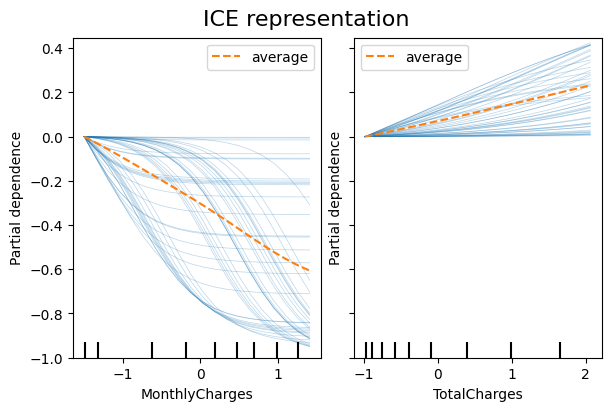

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(ncols=2, figsize=(6, 4), sharey=True, constrained_layout=True)

features_info = {
    "features": ["MonthlyCharges", "TotalCharges"],
    "kind": "both",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    model,
    train,
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle("ICE representation", fontsize=16)

In [ ]:
numerical_features = ['MonthlyCharges','TotalCharges', 'tenure']
categorical_features = train.columns.drop(numerical_features)


Computing partial dependence plots...


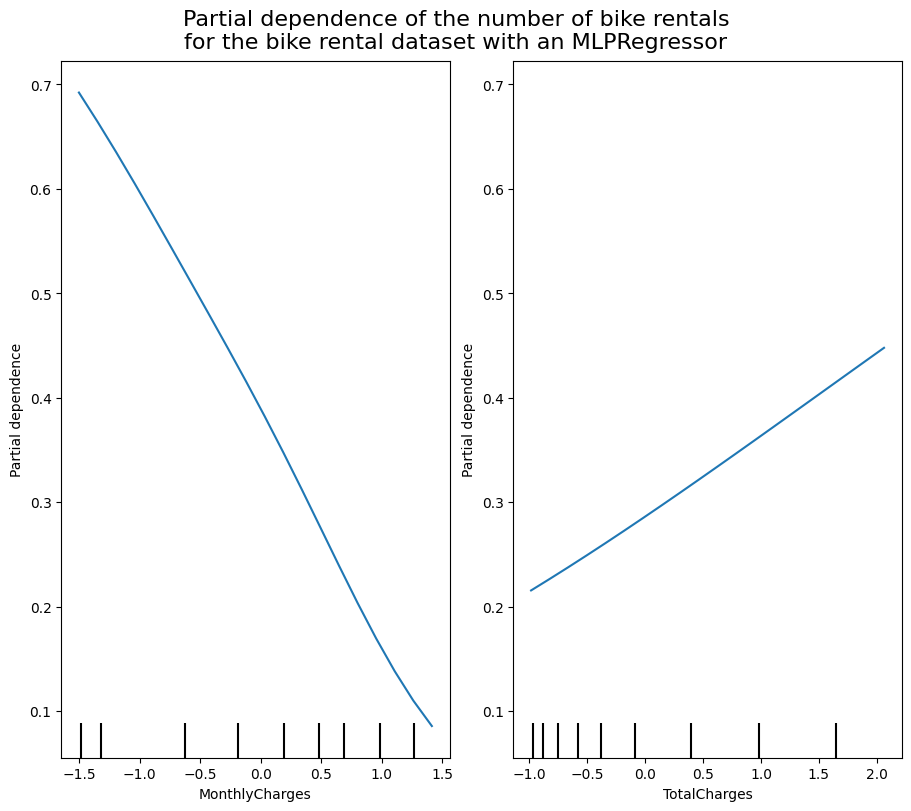

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

print("Computing partial dependence plots...")
features_info = {
    # features of interest
    "features": ['MonthlyCharges','TotalCharges'],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": categorical_features,
}
_, ax = plt.subplots(ncols=2,  figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    model,
    train,
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle(
    (
        "PDP"
    ),
    fontsize=16,
)